<h1>Optimization Methods</h1>
<ul>
    <li>Batch Gradient Descent</li>
    <li>Mini-Batch Gradient Descent</li>
    <li>Momentum</li>
    <li>Adam</li>
    <li>Learning Rate Decay</li>
    <li>Learning Rate Scheduling</li>
</ul>

<h2>Import Dependencies</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets
from optimization_utils import *
from copy import deepcopy

<h2>Batch Gradient Descent</h2>

In [2]:
def batch_gradient_descent(parameters, grads, learning_rate):
    '''
    Using batch gradient descent for updating
    
    Args:
    parameters -- weights and bias
    grads -- gradient for weights and bias
    learning_rate -- learning rate alpha
    
    Returns:
    parameters -- updated parameters
    '''
    
    L = len(parameters) // 2
    for i in range(1, L+1):
        parameters['W' + str(i)] = parameters['W' + str(i)] - learning_rate * grads['dW' + str(i)]
        parameters['b' + str(i)] = parameters['b' + str(i)] - learning_rate * grads['db' + str(i)]
    
    return parameters

In [3]:
# test 
np.random.seed(1) 
learning_rate = 0.01
W1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
W2 = np.random.randn(3,2)
b2 = np.random.randn(3,1)

dW1 = np.random.randn(2,3)
db1 = np.random.randn(2,1)
dW2 = np.random.randn(3,2)
db2 = np.random.randn(3,1)

parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

In [4]:
parameters = batch_gradient_descent(parameters, grads, learning_rate)
for i in range(1, len(parameters) // 2 + 1):
    print(f"W{str(i)} {parameters['W' + str(i)]}")
    print(f"b{str(i)} {parameters['b' + str(i)]}")

W1 [[ 1.63312395 -0.61217855 -0.5339999 ]
 [-1.06196243  0.85396039 -2.3105546 ]]
b1 [[ 1.73978682]
 [-0.77021546]]
W2 [[ 0.32587637 -0.24814147]
 [ 1.47146563 -2.05746183]
 [-0.32772076 -0.37713775]]
b2 [[ 1.13773698]
 [-1.09301954]
 [-0.16397615]]


<h2>Mini-Batch Gradient Descent</h2>

In [5]:
def random_mini_batches(X, Y, batch_size, seed = 0):
    '''
    mini-batch gradient descent
    
    Args:
    X -- training data
    Y -- training label
    batch_size -- number of samples in a batch
    
    Returns:
    mini_batches -- training data in mini-batches
    '''
    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []
    
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation]
    num_batches = math.floor(m / batch_size)
    
    for i in range(num_batches):
        mini_batch_X = shuffled_X[:,i*batch_size:i*batch_size+batch_size]
        mini_batch_Y = shuffled_Y[:,i*batch_size:i*batch_size+batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X_final = shuffled_X[:,(num_batches-1)*batch_size+batch_size:m]
        mini_batch_Y_final = shuffled_Y[:,(num_batches-1)*batch_size+batch_size:m]
        mini_batch_final = (mini_batch_X_final, mini_batch_Y_final)
        mini_batches.append(mini_batch_final)
    
    return mini_batches

In [6]:
# test 

np.random.seed(1)
mini_batch_size = 64
nx = 12288
m = 148
X = np.array([x for x in range(nx * m)]).reshape((m, nx)).T
Y = np.random.randn(1, m) < 0.5

mini_batches = random_mini_batches(X, Y, mini_batch_size)

In [7]:
# test

np.random.seed(1)
mini_batch_size = 64
test_X = np.random.randn(12288, 148)
test_Y = np.random.randn(1, 148) < 0.5

mini_batches = random_mini_batches(test_X, test_Y, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


<h2>Momentum</h2>

In [8]:
def initialize_velocity(parameters):
    '''
    initialize velocity for momentum algorithm
    
    Args:
    parameters -- weights and bias
    
    Returns:
    velocity -- a dictionary for momentum
    '''
    
    L = len(parameters) // 2
    velocities = {}
    
    for i in range(1, L+1):
        velocities['dW' + str(i)] = np.zeros(parameters['W' + str(i)].shape)
        velocities['db' + str(i)] = np.zeros(parameters['b' + str(i)].shape)
    
    return velocities

In [9]:
# test

np.random.seed(1)
W1 = np.random.randn(3,2)
b1 = np.random.randn(3,1)
W2 = np.random.randn(3,3)
b2 = np.random.randn(3,1)
parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

velocities = initialize_velocity(parameters)
print("velocities[\"dW1\"] =\n" + str(velocities["dW1"]))
print("velocities[\"db1\"] =\n" + str(velocities["db1"]))
print("velocities[\"dW2\"] =\n" + str(velocities["dW2"]))
print("velocities[\"db2\"] =\n" + str(velocities["db2"]))

velocities["dW1"] =
[[0. 0.]
 [0. 0.]
 [0. 0.]]
velocities["db1"] =
[[0.]
 [0.]
 [0.]]
velocities["dW2"] =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
velocities["db2"] =
[[0.]
 [0.]
 [0.]]


In [10]:
def momentum(parameters, grads, velocities, learning_rate, beta):
    '''
    perform momentum
    
    Args:
    parameters -- weights and bias
    grads -- gradients
    velocities -- previous gradient directions
    learning_rate -- learning rate alpha
    beta -- momentum beta
    
    Returns:
    parameters -- updated parameters
    velocities -- previous gradient directions
    '''
    
    L = len(parameters) // 2
    for i in range(1, L+1):
        velocities['dW' + str(i)] = beta * velocities['dW' + str(i)] + (1-beta) * grads['dW' + str(i)]
        parameters['W' + str(i)] = parameters['W' + str(i)] - learning_rate * velocities['dW' + str(i)]
        velocities['db' + str(i)] = beta * velocities['db' + str(i)] + (1-beta) * grads['db' + str(i)]
        parameters['b' + str(i)] = parameters['b' + str(i)] - learning_rate * velocities['db' + str(i)]
    
    return parameters, velocities

In [11]:
# test

np.random.seed(1)
W1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
W2 = np.random.randn(3,2)
b2 = np.random.randn(3,1)

dW1 = np.random.randn(2,3)
db1 = np.random.randn(2,1)
dW2 = np.random.randn(3,2)
db2 = np.random.randn(3,1)

parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

velocities = {'dW1': np.array([[ 0.,  0.,  0.],
                      [ 0.,  0.,  0.]]), 
     'dW2': np.array([[ 0.,  0.],
                      [ 0.,  0.],
                      [ 0.,  0.]]), 
     'db1': np.array([[ 0.],
                      [ 0.]]), 
     'db2': np.array([[ 0.],
                      [ 0.],
                      [ 0.]])}
beta = 0.9
learning_rate = 0.01

parameters, velocities = momentum(parameters, grads, velocities, learning_rate, beta)
print("W1 = \n" + str(parameters["W1"]))
print("b1 = \n" + str(parameters["b1"]))
print("W2 = \n" + str(parameters["W2"]))
print("b2 = \n" + str(parameters["b2"]))
print("velocities[\"dW1\"] = \n" + str(velocities["dW1"]))
print("velocities[\"db1\"] = \n" + str(velocities["db1"]))
print("velocities[\"dW2\"] = \n" + str(velocities["dW2"]))
print("velocities[\"db2\"] = v" + str(velocities["db2"]))

W1 = 
[[ 1.62522322 -0.61179863 -0.52875457]
 [-1.071868    0.86426291 -2.30244029]]
b1 = 
[[ 1.74430927]
 [-0.76210776]]
W2 = 
[[ 0.31972282 -0.24924749]
 [ 1.46304371 -2.05987282]
 [-0.32294756 -0.38336269]]
b2 = 
[[ 1.1341662 ]
 [-1.09920409]
 [-0.171583  ]]
velocities["dW1"] = 
[[-0.08778584  0.00422137  0.05828152]
 [-0.11006192  0.11447237  0.09015907]]
velocities["db1"] = 
[[0.05024943]
 [0.09008559]]
velocities["dW2"] = 
[[-0.06837279 -0.01228902]
 [-0.09357694 -0.02678881]
 [ 0.05303555 -0.06916608]]
velocities["db2"] = v[[-0.03967535]
 [-0.06871727]
 [-0.08452056]]


<h2>Adam</h2>

In [24]:
def initialize_adam(parameters):
    '''
    init v and s
    
    Args:
    parameters -- weights and bias
    
    Returns:
    velocities -- past gradient directions
    squared_velocities -- squared past gradient directions
    '''
    
    L = len(parameters) // 2
    velocities = {}
    squared_velocities = {}
    
    for i in range(1, L+1):
        velocities['dW' + str(i)] = np.zeros(parameters['W' + str(i)].shape)
        velocities['db' + str(i)] = np.zeros(parameters['b' + str(i)].shape)
        squared_velocities['dW' + str(i)] = np.zeros(parameters['W' + str(i)].shape)
        squared_velocities['db' + str(i)] = np.zeros(parameters['b' + str(i)].shape)
    
    return velocities, squared_velocities

In [25]:
np.random.seed(1)
W1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
W2 = np.random.randn(3,2)
b2 = np.random.randn(3,1)
parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

velocities, squared_velocities = initialize_adam(parameters)

print("velocities[\"dW1\"] = \n" + str(velocities["dW1"]))
print("velocities[\"db1\"] = \n" + str(velocities["db1"]))
print("velocities[\"dW2\"] = \n" + str(velocities["dW2"]))
print("velocities[\"db2\"] = \n" + str(velocities["db2"]))
print("squared_velocities[\"dW1\"] = \n" + str(squared_velocities["dW1"]))
print("squared_velocities[\"db1\"] = \n" + str(squared_velocities["db1"]))
print("squared_velocities[\"dW2\"] = \n" + str(squared_velocities["dW2"]))
print("squared_velocities[\"db2\"] = \n" + str(squared_velocities["db2"]))

velocities["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
velocities["db1"] = 
[[0.]
 [0.]]
velocities["dW2"] = 
[[0. 0.]
 [0. 0.]
 [0. 0.]]
velocities["db2"] = 
[[0.]
 [0.]
 [0.]]
squared_velocities["dW1"] = 
[[0. 0. 0.]
 [0. 0. 0.]]
squared_velocities["db1"] = 
[[0.]
 [0.]]
squared_velocities["dW2"] = 
[[0. 0.]
 [0. 0.]
 [0. 0.]]
squared_velocities["db2"] = 
[[0.]
 [0.]
 [0.]]


In [14]:
def adam(parameters, grads, velocities, squared_velocities, learning_rate, beta_1, beta_2, epsilon, t):
    '''
    perform adam algorithm
    
    Args:
    parameters -- weights and bias
    grads -- gradients
    velocities -- past gradient directions
    squared_velocities -- squared past gradient directions
    learning_rate -- learning rate alpha
    beta_1 -- hyperparameters beta_1 for velocities
    beta_2 -- hyperparameters beta_2 for squared_velocities
    epsilon -- a very small number to prevent divide by zero
    t -- indexes current training literation (indexed at 0)
    
    Returns:
    parameters -- updated parameters
    velocities -- past gradient directions
    squared_velocities -- squared past gradient directions
    '''
    
    L = len(parameters) // 2
    velocities_corrected = {}
    squared_velocities_corrected = {} 
    
    for i in range(1, L+1):
        velocities['dW' + str(i)] = beta_1 * velocities['dW' + str(i)] + (1-beta_1) * grads['dW' + str(i)]
        velocities_corrected['dW' + str(i)] = velocities['dW' + str(i)] / (1-np.power(beta_1, t))
        squared_velocities['dW' + str(i)] = beta_2 * squared_velocities['dW' + str(i)] + (1-beta_2) * np.power(grads['dW' + str(i)], 2)
        squared_velocities_corrected['dW' + str(i)] = squared_velocities['dW' + str(i)] / (1-np.power(beta_2, t))
        parameters['W' + str(i)] = parameters['W' + str(i)] - learning_rate * (velocities_corrected['dW' + str(i)] / (np.sqrt(squared_velocities_corrected['dW' + str(i)]) + epsilon))
        
        velocities['db' + str(i)] = beta_1 * velocities['db' + str(i)] + (1-beta_1) * grads['db' + str(i)]
        velocities_corrected['db' + str(i)] = velocities['db' + str(i)] / (1-np.power(beta_1, t))
        squared_velocities['db' + str(i)] = beta_2 * squared_velocities['db' + str(i)] + (1-beta_2) * np.power(grads['db' + str(i)], 2)
        squared_velocities_corrected['db' + str(i)] = squared_velocities['db' + str(i)] / (1-np.power(beta_2, t))
        parameters['b' + str(i)] = parameters['b' + str(i)] - learning_rate * (velocities_corrected['db' + str(i)] / (np.sqrt(squared_velocities_corrected['db' + str(i)]) + epsilon))
        
    return parameters, velocities, squared_velocities, velocities_corrected, squared_velocities_corrected

In [15]:
# test

np.random.seed(1)
velocities, squared_velocities = ({'dW1': np.array([[ 0.,  0.,  0.], # (2, 3)
                          [ 0.,  0.,  0.]]), 
         'dW2': np.array([[ 0.,  0.],      # (3, 2)
                          [ 0.,  0.],
                          [ 0.,  0.]]), 
         'db1': np.array([[ 0.],           # (2, 1)
                          [ 0.]]), 
         'db2': np.array([[ 0.],          # (3, 1)
                          [ 0.],
                          [ 0.]])}, 
        {'dW1': np.array([[ 0.,  0.,  0.], # (2, 3)
                          [ 0.,  0.,  0.]]), 
         'dW2': np.array([[ 0.,  0.],      # (3, 2)
                          [ 0.,  0.],
                          [ 0.,  0.]]), 
         'db1': np.array([[ 0.],           # (2, 1)
                          [ 0.]]), 
         'db2': np.array([[ 0.],           # (3, 1)
                          [ 0.],
                          [ 0.]])})
W1 = np.random.randn(2,3)
b1 = np.random.randn(2,1)
W2 = np.random.randn(3,2)
b2 = np.random.randn(3,1)

dW1 = np.random.randn(2,3)
db1 = np.random.randn(2,1)
dW2 = np.random.randn(3,2)
db2 = np.random.randn(3,1)

parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

t = 2
learning_rate = 0.02
beta_1 = 0.8
beta_2 = 0.888
epsilon = 1e-2

parameters, velocities, velocities_corrected, squared_velocities, squared_velocities_corrected = adam(parameters, grads, velocities, squared_velocities, learning_rate, beta_1, beta_2, epsilon, t)

print(f"W1 = \n{parameters['W1']}")
print(f"W2 = \n{parameters['W2']}")
print(f"b1 = \n{parameters['b1']}")
print(f"b2 = \n{parameters['b2']}")

W1 = 
[[ 1.63937725 -0.62327448 -0.54308727]
 [-1.0578897   0.85032154 -2.31657668]]
W2 = 
[[ 0.33400549 -0.23563857]
 [ 1.47715417 -2.04561842]
 [-0.33729882 -0.36908457]]
b1 = 
[[ 1.72995096]
 [-0.7762447 ]]
b2 = 
[[ 1.14852557]
 [-1.08492339]
 [-0.15740527]]


<h2>Training</h2>

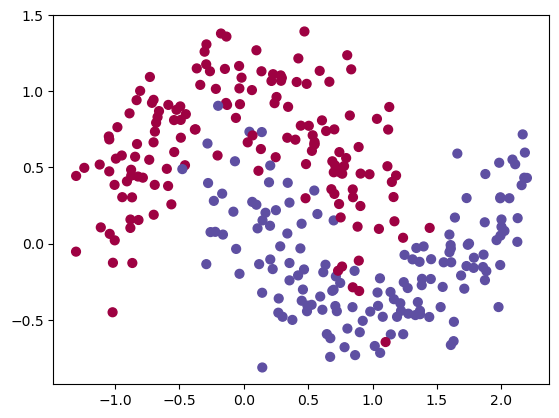

In [16]:
train_X, train_Y = load_dataset()

In [30]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    optimizer -- the optimizer to be passed, gradient descent, momentum or adam
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)            
    costs = []                      
    t = 0                         
    seed = 10                      
    m = X.shape[1]               

    parameters = initialize_parameters(layers_dims)

    if optimizer == "gd":
        pass 
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    for i in range(num_epochs):  
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            (minibatch_X, minibatch_Y) = minibatch

            a3, caches = forward_propagation(minibatch_X, parameters)

            cost_total += compute_cost(a3, minibatch_Y)
            
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            if optimizer == "gd":
                parameters = batch_gradient_descent(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = momentum(parameters, grads, v, learning_rate, beta)
            elif optimizer == "adam":
                t = t + 1 
                parameters, v, s, _, _ = adam(parameters, grads, v, s, learning_rate, beta1, beta2, epsilon, t)
                
        cost_avg = cost_total / m
        
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Cost after epoch 0: 0.702405
Cost after epoch 1000: 0.668101
Cost after epoch 2000: 0.635288
Cost after epoch 3000: 0.600491
Cost after epoch 4000: 0.573367


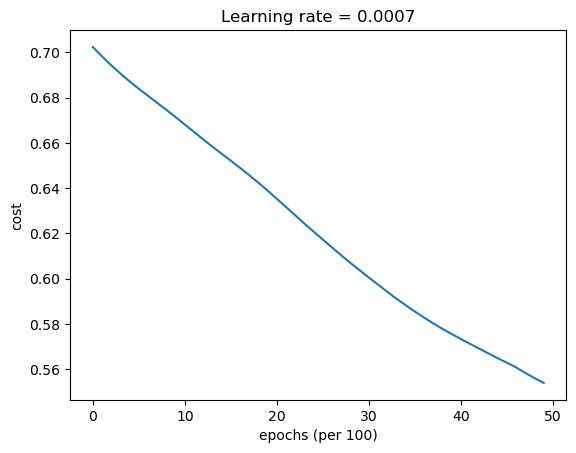

Acc: 0.7166666666666667


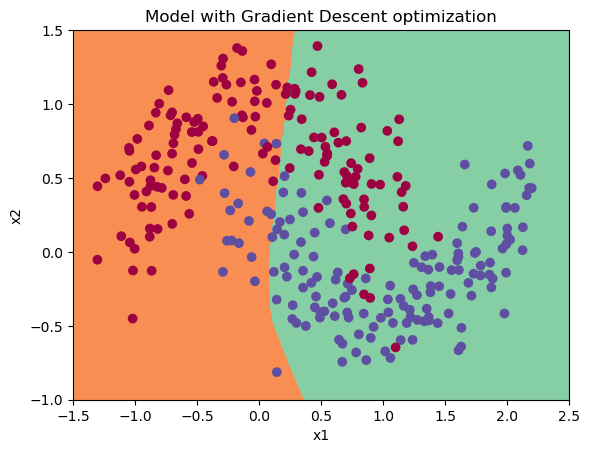

In [31]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after epoch 0: 0.702413
Cost after epoch 1000: 0.668167
Cost after epoch 2000: 0.635388
Cost after epoch 3000: 0.600591
Cost after epoch 4000: 0.573444


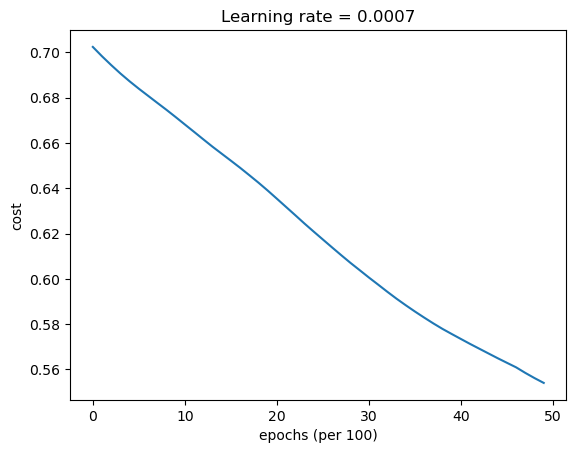

Acc: 0.7166666666666667


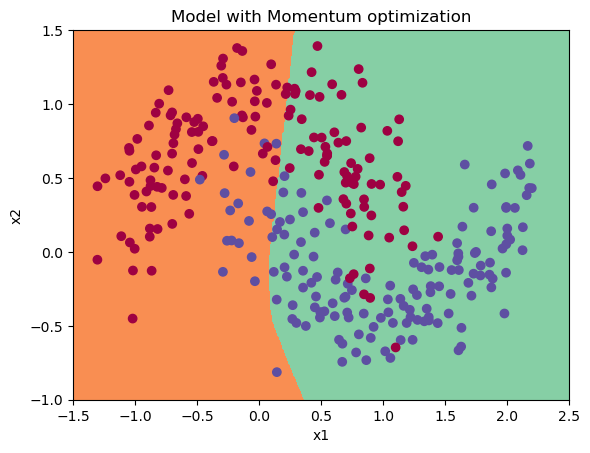

In [32]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after epoch 0: 0.702166
Cost after epoch 1000: 0.167845
Cost after epoch 2000: 0.141316
Cost after epoch 3000: 0.138788
Cost after epoch 4000: 0.136066


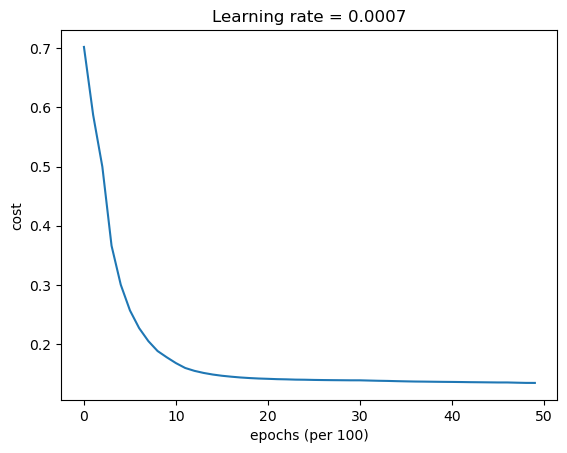

Acc: 0.9433333333333334


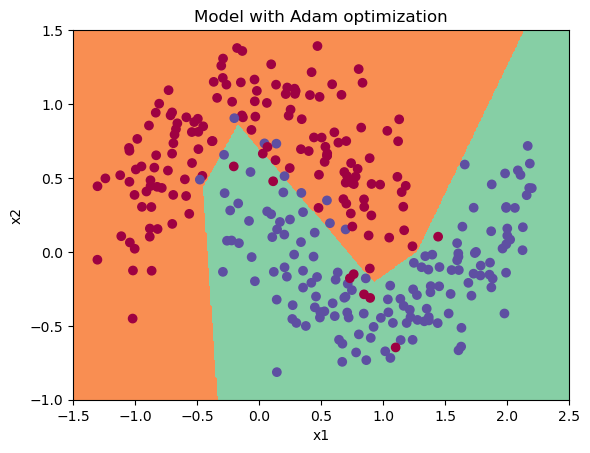

In [33]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<h2>Learning Rate Decay and Scheduling</h2>

In [53]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True, decay = None, decay_rate = 1):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    optimizer -- the optimizer to be passed, gradient descent, momentum or adam
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)            
    costs = []                      
    t = 0                         
    seed = 10                      
    m = X.shape[1]               
    lr_rates = []
    learning_rate0 = learning_rate
    parameters = initialize_parameters(layers_dims)

    if optimizer == "gd":
        pass 
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    for i in range(num_epochs):  
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            (minibatch_X, minibatch_Y) = minibatch

            a3, caches = forward_propagation(minibatch_X, parameters)

            cost_total += compute_cost(a3, minibatch_Y)
            
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            if optimizer == "gd":
                parameters = batch_gradient_descent(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = momentum(parameters, grads, v, learning_rate, beta)
            elif optimizer == "adam":
                t = t + 1 
                parameters, v, s, _, _ = adam(parameters, grads, v, s, learning_rate, beta1, beta2, epsilon, t)
                
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
        
        
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

<h3>Exponential Learning Rate Decay</h3>

In [54]:
def update_learning_rate(learning_rate, epoch_num, decay_rate):
    '''
    update learning rate using exponential weight decay
    
    Args:
    learning_rate -- learning rate alpha
    epoch_num -- the training epoch
    decay_rate -- decay rate
    
    Returns:
    updated_learning_rate
    '''
    
    updated_learning_rate = learning_rate / (1 + epoch_num * decay_rate)
    
    return updated_learning_rate

In [55]:
# test

learning_rate = 0.5
print(f'Original learning rate: {learning_rate}')
epoch_num = 2
decay_rate = 1
updated_learning_rate = update_learning_rate(learning_rate, epoch_num, decay_rate)
print(f'Updated learning rate: {updated_learning_rate}')

Original learning rate: 0.5
Updated learning rate: 0.16666666666666666


Cost after epoch 0: 0.702405
learning rate after epoch 0: 0.000700
Cost after epoch 1000: 0.702057
learning rate after epoch 1000: 0.000001
Cost after epoch 2000: 0.702028
learning rate after epoch 2000: 0.000000
Cost after epoch 3000: 0.702010
learning rate after epoch 3000: 0.000000
Cost after epoch 4000: 0.701998
learning rate after epoch 4000: 0.000000


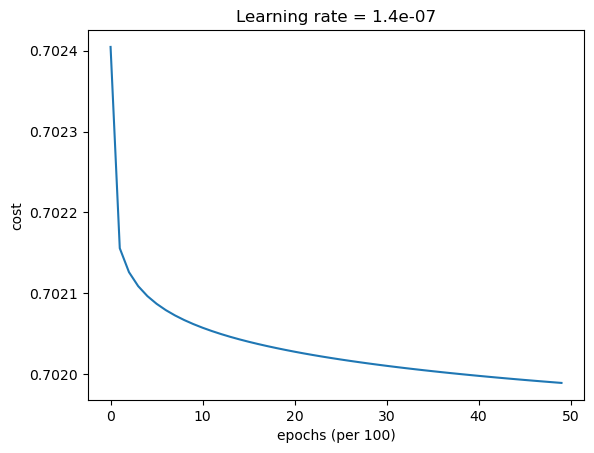

Acc: 0.6066666666666667


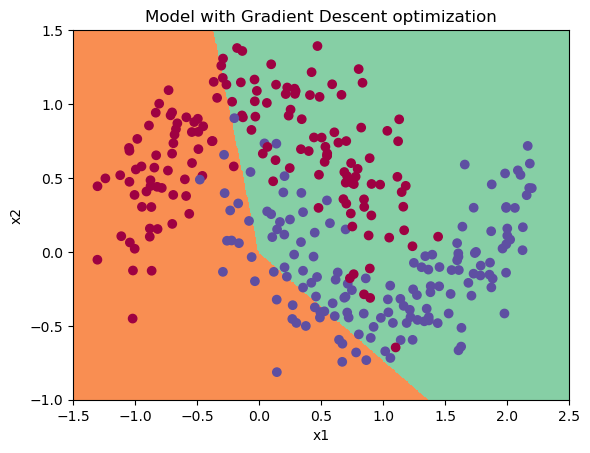

In [56]:
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = 'gd', decay = update_learning_rate)
predictions = predict(train_X, train_Y, parameters)

plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

<h2>Schedule Learning Rate Decay</h3>

In [63]:
def schedule_learning_rate_decay(learning_rate, epoch_num, decay_rate, time_interval = 1000):
    '''
    update learning rate using scheduled learning rate decay
    
    Args:
    learning_rate -- learning rate alpha
    epoch_num -- training epoches
    time_interval -- time to update
    decay_rate -- decay rate 
    
    Returns:
    updated_learning_rate -- updated learning rate
    '''
    
    updated_learning_rate = learning_rate / (1 + decay_rate * np.floor(epoch_num / time_interval))
    return updated_learning_rate

In [64]:
# test

learning_rate = 0.5
print("Original learning rate: ", learning_rate)

epoch_num_1 = 10
epoch_num_2 = 100
decay_rate = 0.3
time_interval = 100
learning_rate_1 = schedule_learning_rate_decay(learning_rate, epoch_num_1, decay_rate, time_interval)
learning_rate_2 = schedule_learning_rate_decay(learning_rate, epoch_num_2, decay_rate, time_interval)
print("Updated learning rate after {} epochs: ".format(epoch_num_1), learning_rate_1)
print("Updated learning rate after {} epochs: ".format(epoch_num_2), learning_rate_2)

Original learning rate:  0.5
Updated learning rate after 10 epochs:  0.5
Updated learning rate after 100 epochs:  0.3846153846153846


Cost after epoch 0: 0.701091
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.127161
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.120304
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.117033
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.117512
learning rate after epoch 4000: 0.020000


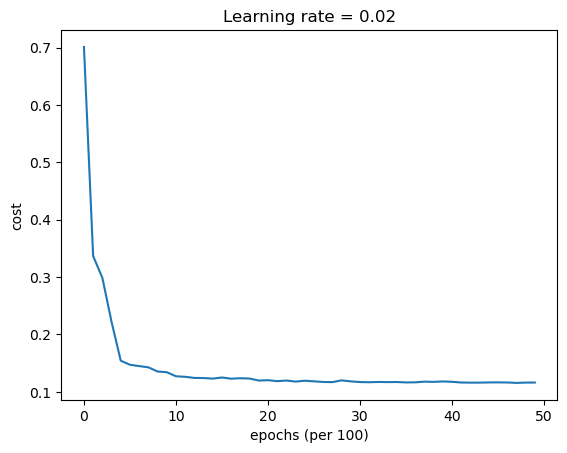

Acc: 0.9433333333333334


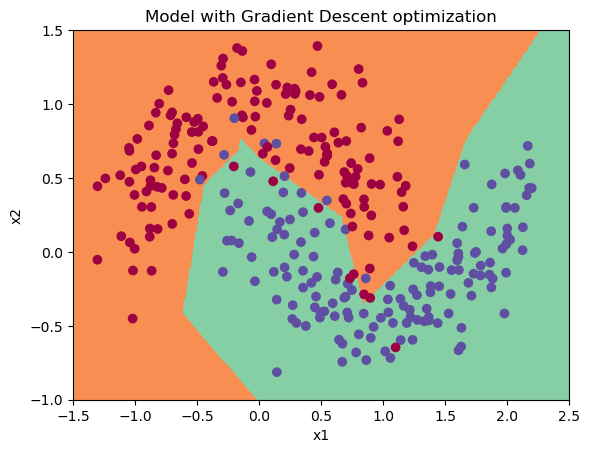

In [65]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=schedule_learning_rate_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after epoch 0: 0.702226
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.128974
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.125965
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.123375
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.123218
learning rate after epoch 4000: 0.020000


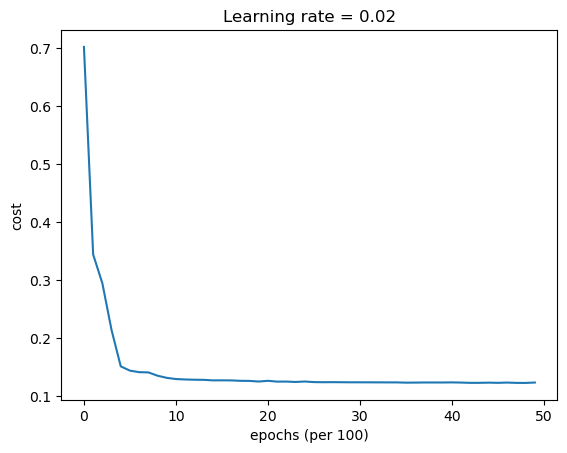

Acc: 0.9533333333333334


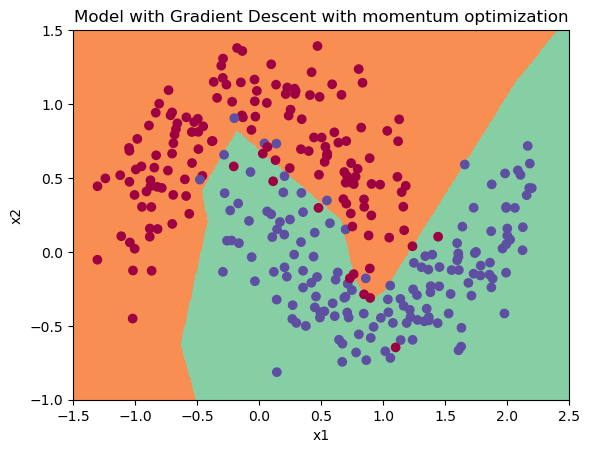

In [66]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "momentum", learning_rate = 0.1, num_epochs=5000, decay=schedule_learning_rate_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent with momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Cost after epoch 0: 0.699346
learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.130074
learning rate after epoch 1000: 0.005000
Cost after epoch 2000: 0.129826
learning rate after epoch 2000: 0.003333
Cost after epoch 3000: 0.129282
learning rate after epoch 3000: 0.002500
Cost after epoch 4000: 0.128361
learning rate after epoch 4000: 0.002000


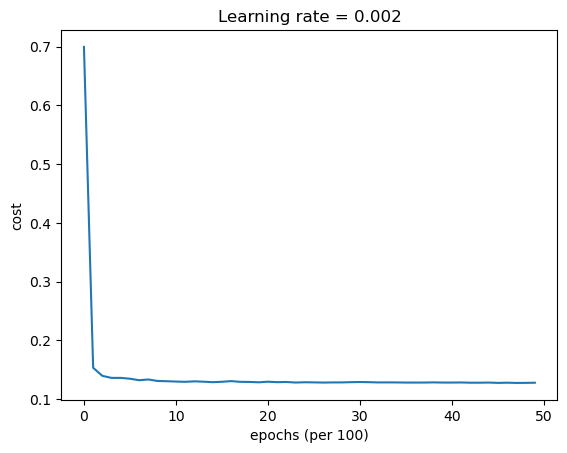

Acc: 0.94


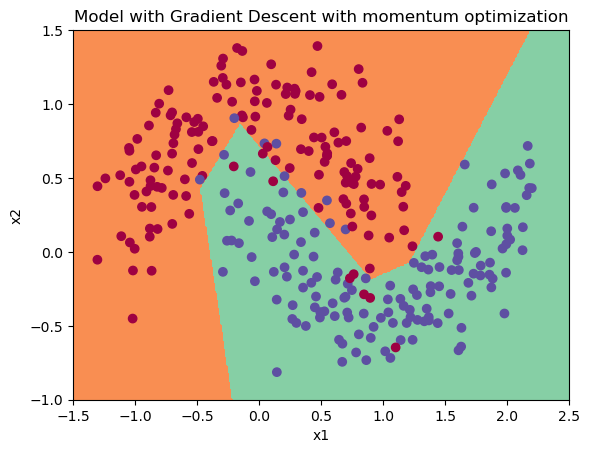

In [68]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam", learning_rate = 0.01, num_epochs=5000, decay=schedule_learning_rate_decay)

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent with momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)